<a href="https://colab.research.google.com/github/putricha/PCVK_Ganjil_2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Putri Norchasana**

**Kelas : TI-3D**

**NIM : 2241720036**

**JOBSHEET 5**

**Import Library**

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

**Histogram Citra Output**

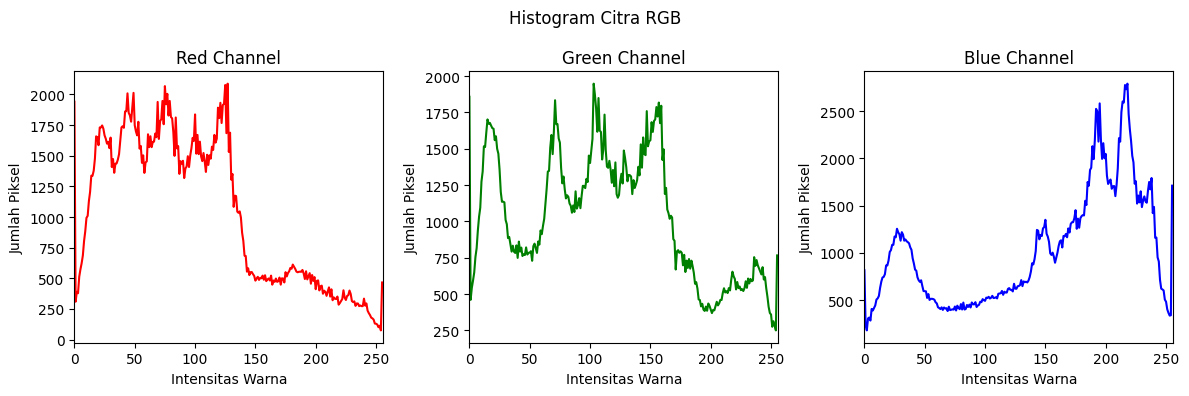

In [ ]:


# Memuat gambar lena
image = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')

# Memisahkan gambar menjadi 3 channel: B, G, R
colors = ('r', 'g', 'b')
channel_names = ('Red', 'Green', 'Blue')

plt.figure(figsize=(12, 4))
plt.suptitle("Histogram Citra RGB")

# Membuat subplot untuk setiap channel warna
for i, color in enumerate(colors):
    plt.subplot(1, 3, i+1)
    histogram = cv.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram, color=color)
    plt.title(f'{channel_names[i]} Channel')
    plt.xlabel("Intensitas Warna")
    plt.ylabel("Jumlah Piksel")
    plt.xlim([0, 256])

# Menampilkan hasil
plt.tight_layout()
plt.show()



**Histogram Citra Output Menggunakan Numpy**

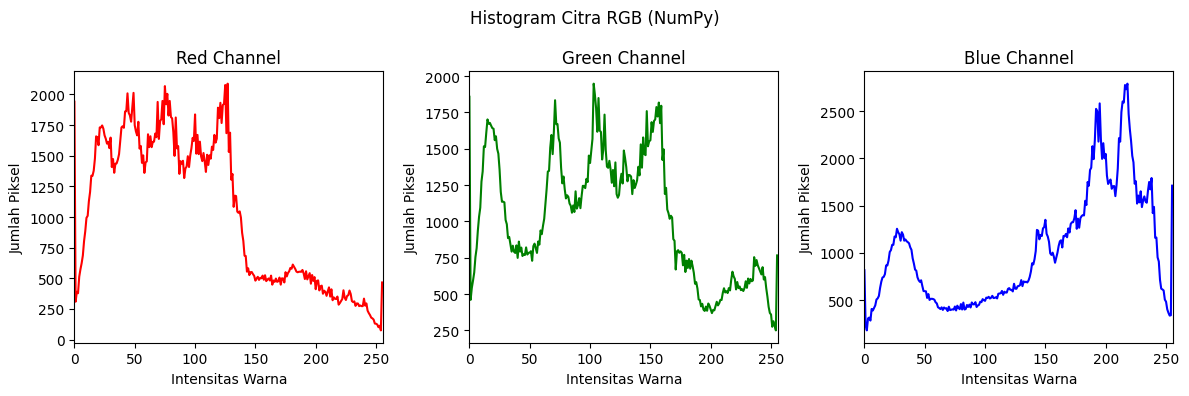

In [ ]:
# Memuat gambar lena
image = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')


# Memisahkan gambar menjadi 3 channel: B, G, R
colors = ('r', 'g', 'b')
channel_names = ('Red', 'Green', 'Blue')

plt.figure(figsize=(12, 4))
plt.suptitle("Histogram Citra RGB (NumPy)")

# Membuat subplot untuk setiap channel warna
for i, color in enumerate(colors):
    plt.subplot(1, 3, i+1)

    # Mendapatkan channel warna yang sesuai
    channel = image[:, :, i]

    # Menggunakan numpy histogram
    histogram, bins = np.histogram(channel.flatten(), bins=256, range=[0, 256])

    # Plot histogramnya
    plt.plot(histogram, color=color)
    plt.title(f'{channel_names[i]} Channel')
    plt.xlabel("Intensitas Warna")
    plt.ylabel("Jumlah Piksel")
    plt.xlim([0, 256])

# Menampilkan hasil
plt.tight_layout()
plt.show()

**Output Histogram Equalization**

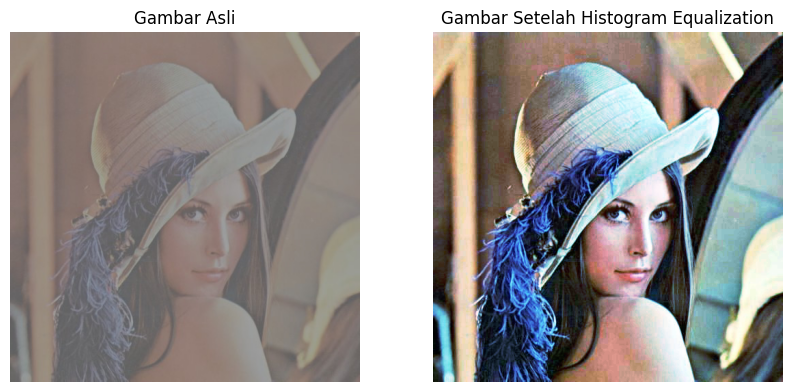

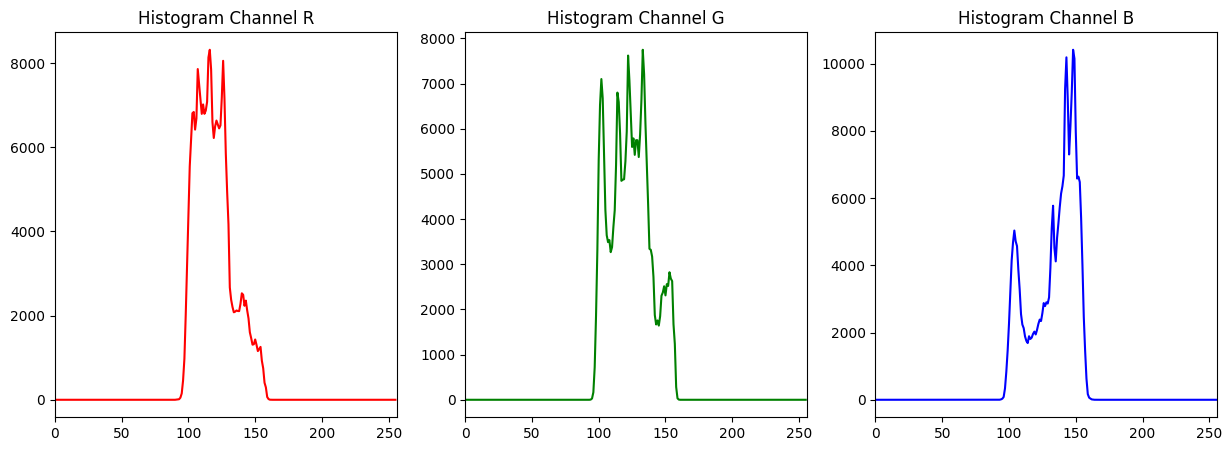

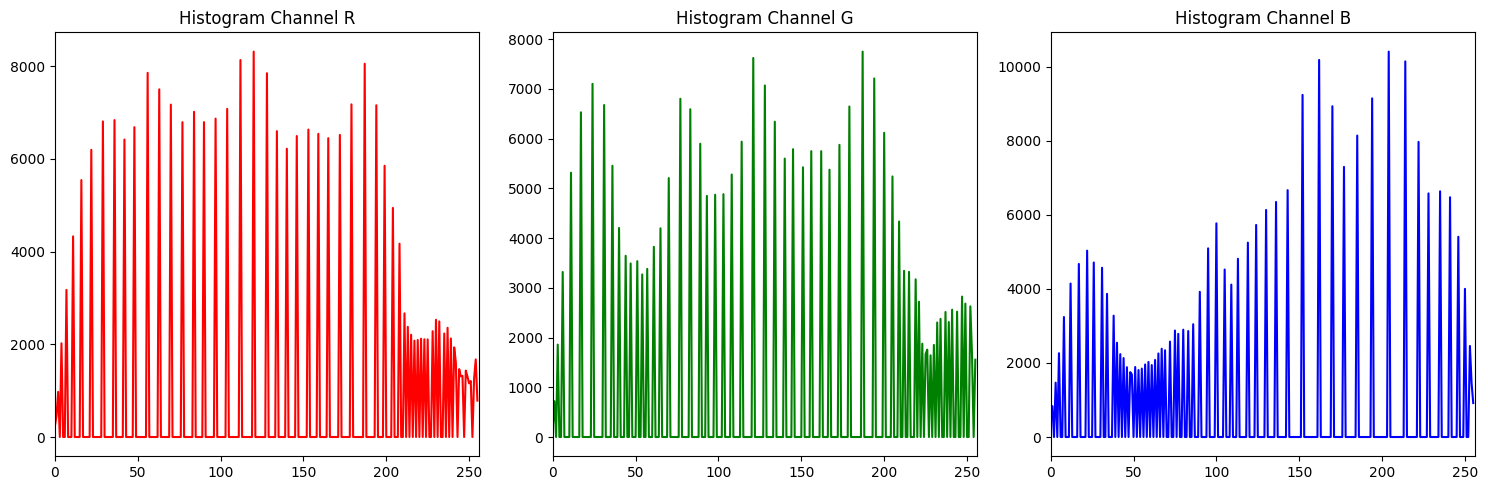

In [ ]:


# Memuat gambar lena_lc.jpg
image = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')

# Menampilkan gambar asli
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Melakukan histogram equalization untuk masing-masing channel warna
channels = cv.split(image)
eq_channels = []
for channel in channels:
    eq_channels.append(cv.equalizeHist(channel))

# Menggabungkan kembali channel yang sudah di equalize
equalized_image = cv.merge(eq_channels)

# Menampilkan gambar setelah histogram equalization
plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(equalized_image, cv.COLOR_BGR2RGB))
plt.title('Gambar Setelah Histogram Equalization')
plt.axis('off')

# Fungsi untuk menghitung dan menampilkan histogram RGB
def plot_histogram(image, title):
    color = ('r', 'g', 'b')
    plt.figure(figsize=(15,5))
    for i, col in enumerate(color):
        hist = cv.calcHist([image], [i], None, [256], [0, 256])
        plt.subplot(1, 3, i + 1)
        plt.plot(hist, color = col)
        plt.xlim([0, 256])
        plt.title(f'Histogram Channel {col.upper()}')

# Menampilkan histogram untuk gambar asli
plot_histogram(image, 'Histogram Gambar Asli')

# Menampilkan histogram untuk gambar yang sudah di equalize
plot_histogram(equalized_image, 'Histogram Setelah Equalization')

plt.tight_layout()
plt.show()


**Output Histogram Equalization  Menggunakan Library EqualizeHist**

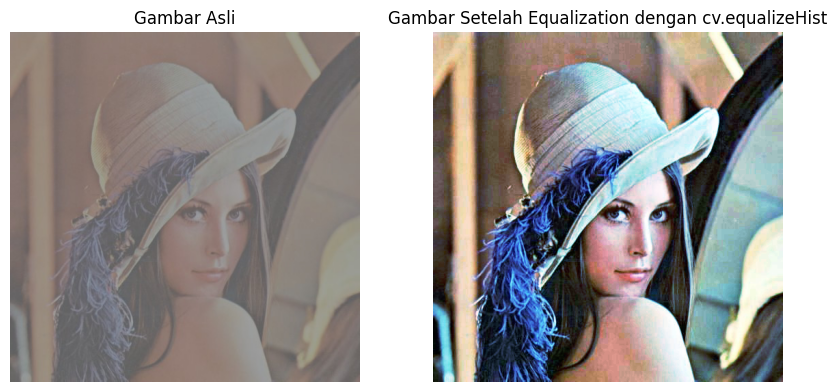

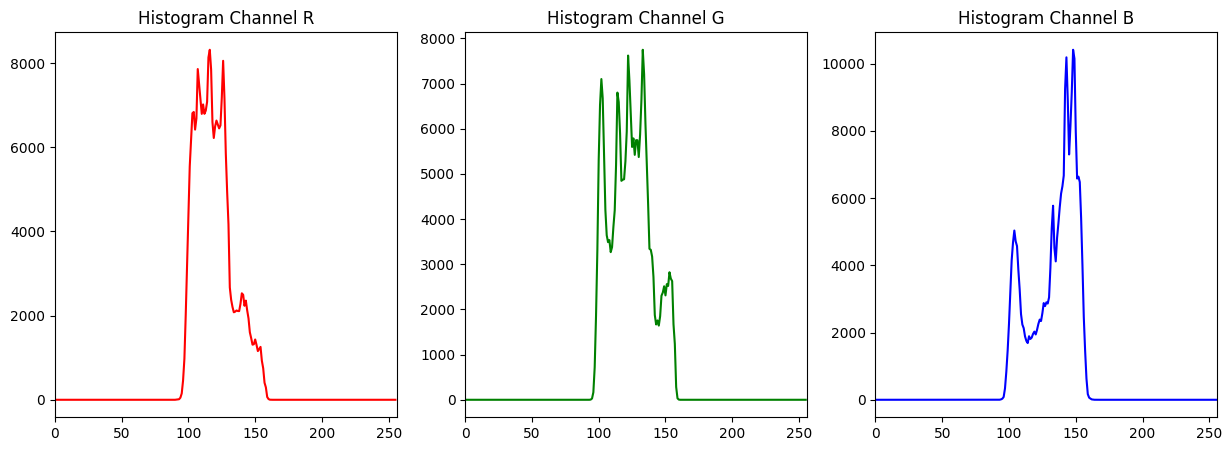

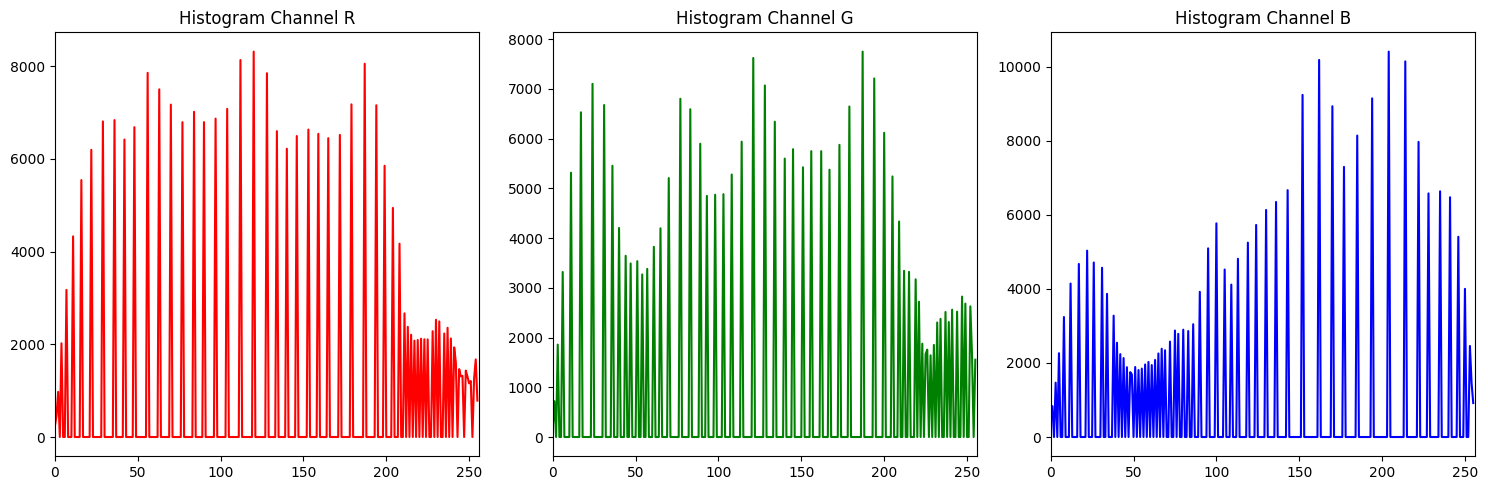

In [ ]:


# Memuat gambar lena_lc.jpg
image = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')

# Menampilkan gambar asli
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Split channel BGR
channels = cv.split(image)

# Equalize tiap channel menggunakan cv.equalizeHist
eq_channels = []
for channel in channels:
    eq_channels.append(cv.equalizeHist(channel))

# Gabungkan kembali channel setelah equalization
equalized_image_cv2 = cv.merge(eq_channels)

# Menampilkan gambar hasil equalization menggunakan cv.equalizeHist
plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(equalized_image_cv2, cv.COLOR_BGR2RGB))
plt.title('Gambar Setelah Equalization dengan cv.equalizeHist')
plt.axis('off')

# Fungsi untuk menghitung dan menampilkan histogram RGB
def plot_histogram(image, title):
    color = ('r', 'g', 'b')
    plt.figure(figsize=(15,5))
    for i, col in enumerate(color):
        hist = cv.calcHist([image], [i], None, [256], [0, 256])
        plt.subplot(1, 3, i + 1)
        plt.plot(hist, color = col)
        plt.xlim([0, 256])
        plt.title(f'Histogram Channel {col.upper()}')

# Menampilkan histogram untuk gambar asli
plot_histogram(image, 'Histogram Gambar Asli')

# Menampilkan histogram untuk gambar yang sudah di equalize dengan cv.equalizeHist
plot_histogram(equalized_image_cv2, 'Histogram Setelah Equalization (cv.equalizeHist)')
plt.tight_layout()
plt.show()


**Pemetaan 16 juta warna RGB ke dalam 8 warna**

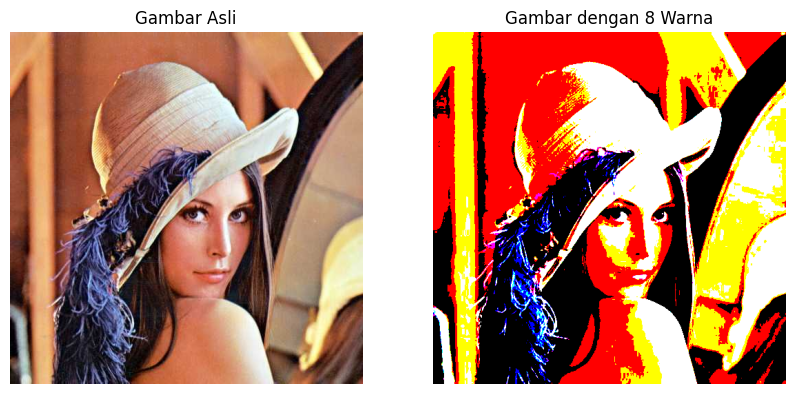

In [ ]:
image = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')

# Definisikan 8 warna target (RGB)
colors = {
    'black': [0, 0, 0],
    'white': [255, 255, 255],
    'red': [255, 0, 0],
    'green': [0, 255, 0],
    'blue': [0, 0, 255],
    'yellow': [255, 255, 0],
    'cyan': [0, 255, 255],
    'magenta': [255, 0, 255]
}

# Konversi gambar ke float32 untuk perhitungan jarak warna
image_float = np.float32(image)

# Buat array baru untuk gambar hasil
output_image = np.zeros_like(image)

# Hitung jarak setiap piksel ke 8 warna target
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        pixel = image_float[i, j]
        # Hitung jarak Euclidean ke setiap warna
        distances = {color: np.linalg.norm(pixel - np.array(value)) for color, value in colors.items()}
        # Temukan warna dengan jarak terdekat
        closest_color = min(distances, key=distances.get)
        # Set piksel di gambar hasil dengan warna terdekat
        output_image[i, j] = colors[closest_color]

# Menampilkan gambar asli
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Menampilkan gambar hasil dengan 8 warna
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.title('Gambar dengan 8 Warna')
plt.axis('off')

plt.show()


**Dithering Floyd and Steinberg**

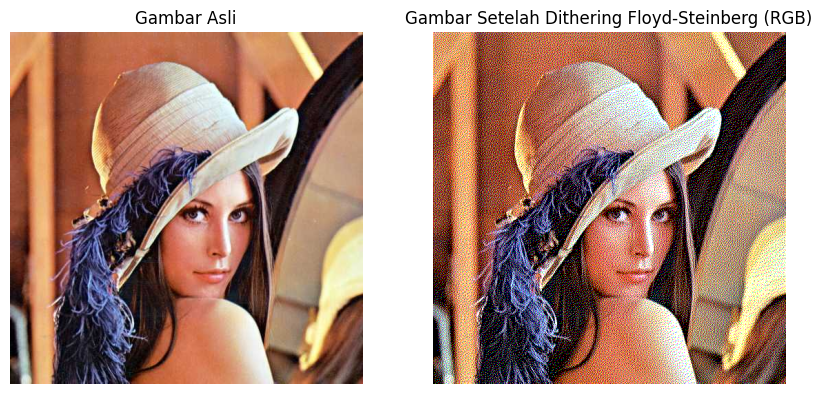

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Memuat gambar
image = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')

# Mendapatkan ukuran gambar
rows, cols, _ = image.shape

# Floyd-Steinberg Dithering untuk setiap kanal (R, G, B)
def floyd_steinberg_dithering(channel):
    dithered_channel = channel.astype(float).copy()
    for i in range(rows):
        for j in range(cols):
            old_pixel = dithered_channel[i, j]
            new_pixel = 255 if old_pixel > 127 else 0  # Thresholding (binerisasi)
            dithered_channel[i, j] = new_pixel
            quant_error = old_pixel - new_pixel

            # Menyebarkan kesalahan kuantisasi ke piksel-piksel tetangga
            if j + 1 < cols:
                dithered_channel[i, j + 1] += quant_error * 7 / 16
            if i + 1 < rows:
                if j > 0:
                    dithered_channel[i + 1, j - 1] += quant_error * 3 / 16
                dithered_channel[i + 1, j] += quant_error * 5 / 16
                if j + 1 < cols:
                    dithered_channel[i + 1, j + 1] += quant_error * 1 / 16
    return np.clip(dithered_channel, 0, 255).astype(np.uint8)

# Pisahkan kanal warna (B, G, R)
b_channel, g_channel, r_channel = cv.split(image)

# Lakukan dithering pada masing-masing kanal
r_dithered = floyd_steinberg_dithering(r_channel)
g_dithered = floyd_steinberg_dithering(g_channel)
b_dithered = floyd_steinberg_dithering(b_channel)

# Gabungkan kembali kanal yang sudah didithering
dithered_image = cv.merge((b_dithered, g_dithered, r_dithered))

# Menampilkan gambar asli
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Menampilkan gambar setelah dithering Floyd-Steinberg
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(dithered_image, cv.COLOR_BGR2RGB))
plt.title('Gambar Setelah Dithering Floyd-Steinberg (RGB)')
plt.axis('off')

plt.show()



**Histogram Equalization**

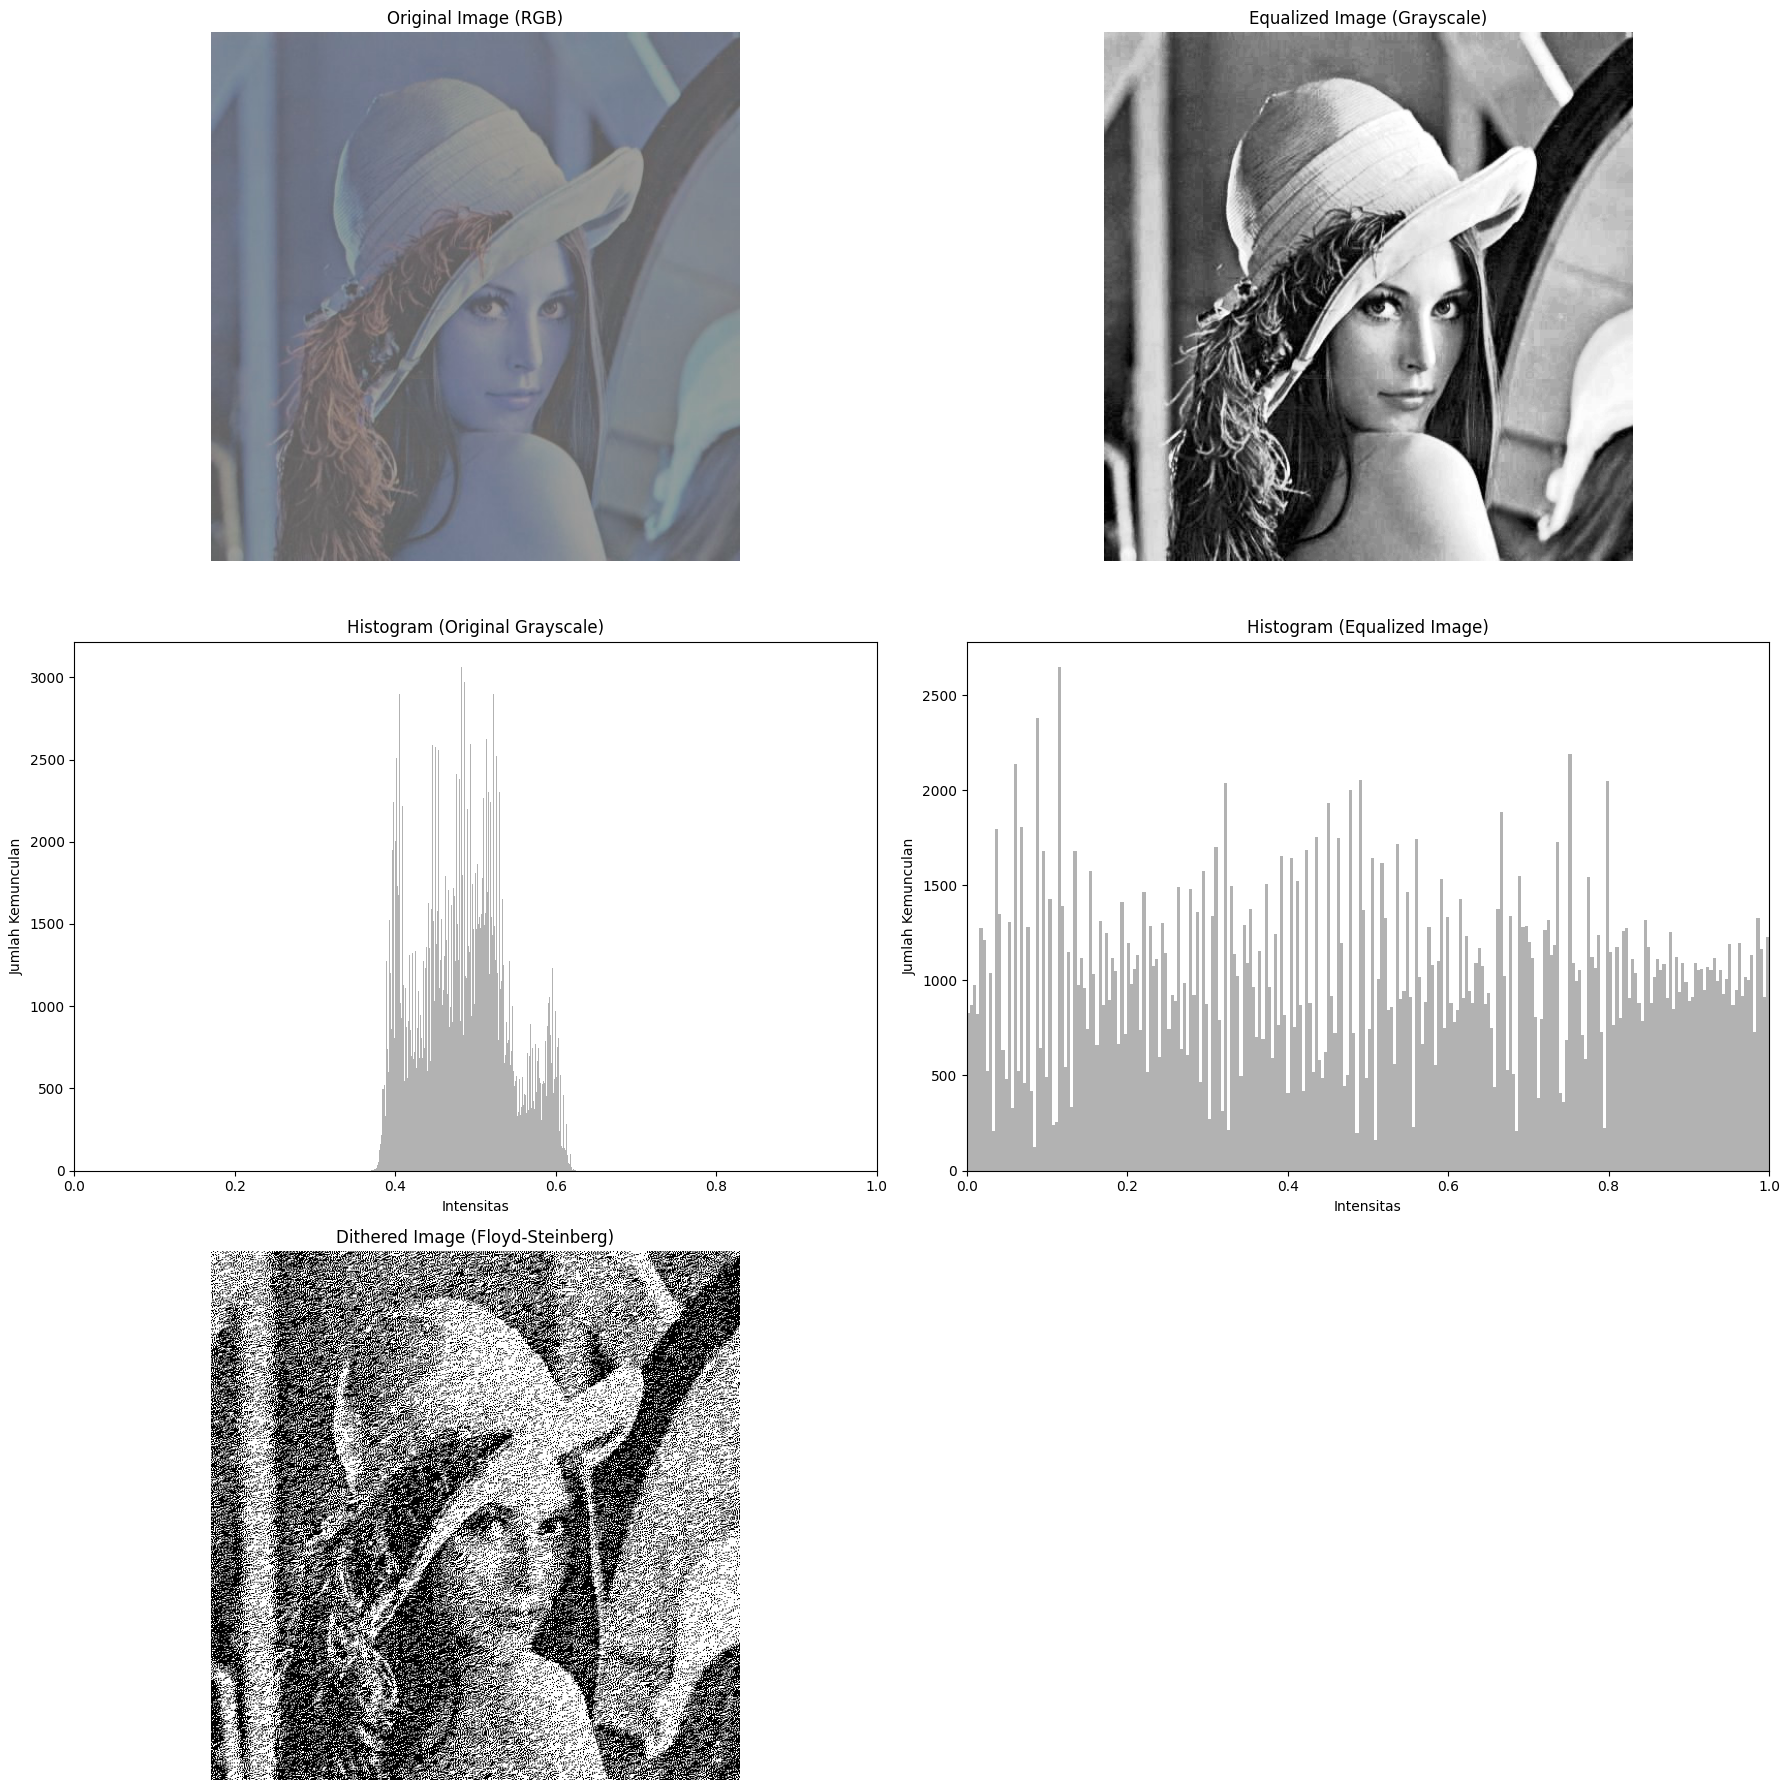

In [ ]:

img_path = ('/content/drive/MyDrive/PCVK/lena_lc.jpg')
img = cv.imread(img_path)
from skimage import color

gray_img = color.rgb2gray(img)

equalized_img = exposure.equalize_hist(gray_img)

def floyd_steinberg_dithering(image, error_weights=(7/16, 3/16, 5/16, 1/16)):
    img = image.copy() * 255  # Scale image to range 0-255
    img = img.astype(np.float32)  # Convert ke float untuk lebih kompleks
    h, w = img.shape

    for y in range(h):
        for x in range(w):
            old_pixel = img[y, x]
            new_pixel = np.round(old_pixel / 255) * 255  # Approximate to 0 or 255
            img[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            if x + 1 < w:
                img[y, x + 1] += quant_error * error_weights[0]  # Right
            if y + 1 < h:
                if x > 0:
                    img[y + 1, x - 1] += quant_error * error_weights[1]  # Below left
                img[y + 1, x] += quant_error * error_weights[2]  # Below
                if x + 1 < w:
                    img[y + 1, x + 1] += quant_error * error_weights[3]  # Below right

    return np.clip(img, 0, 255).astype(np.uint8)  # Clip to valid pixel range and convert to uint8



dithered_img = floyd_steinberg_dithering(equalized_img, error_weights = (1.0, 0.8, 0.7, 0.5))

plt.figure(figsize=(18, 18))

plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image (RGB)')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image (Grayscale)')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.hist(gray_img.ravel(), bins=256, color='gray', alpha=0.6)
plt.title('Histogram (Original Grayscale)')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 1)

plt.subplot(3, 2, 4)
plt.hist(equalized_img.ravel(), bins=256, color='gray', alpha=0.6)
plt.title('Histogram (Equalized Image)')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 1)

plt.subplot(3, 2, 5)
plt.imshow(dithered_img, cmap='gray')
plt.title('Dithered Image (Floyd-Steinberg)')
plt.axis('off')

plt.tight_layout()
plt.show()